<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: The train-test split
© ExploreAI Academy

In this notebook, we will examine the need for unseen data when assessing the performance of a model and how we can simulate it by splitting our existing dataset in various ways.

## Learning objectives

By the end of this lesson, we will:

* Know why and how to split a dataset into training and testing subsets.
* Know what is meant by a validation set and why it is important.
* Carry out the train-test split using `sklearn` in Python.
* Be able to review the performance of a model using the training and testing sets.

## Introduction

When fitting a machine learning model to some data, we ultimately intend to use that model to **make predictions/forecasts on real-world data**. 

Real-world data refer to data that the model has never come across – the model hasn't had the opportunity to ingest this data in any of the training runs. In order to validate our model (and objectively assess how well it performs), we need to **test it on 'new' data**.

However, gathering unseen data is not a simple task: Any new data would need to be cleaned, wrangled, and annotated just like the original data in our dataset. The next best thing, then, is to use some portion of the existing dataset to **simulate** some real-world, unseen data.

### 1. Two-way split

This technique involves splitting a dataset into **two sets**:

- **The training set:** Used for training the model.
- **The testing set:** Used for testing the model.
   
We fit a model using the **training data** and then assess its accuracy using the **test set**.

We can use an **80-20 split**, i.e. use 80% of the data for training and keep 20% aside for testing. In other words, the training set will contain 80% of the rows, or data points, and the remaining 20% of rows will be in the test set. 

> These rows are **selected at random**, to ensure that the mix of data in the training set is as close as possible to the mix in the test set.

Other train-test ratios, such as 70-30, can be applied depending on the requirements of the project.

### 2. Three-way split

This technique involves splitting a dataset into **three distinct parts**:
- **Training set**
- **Validation set**
- **Testing set** 

The idea here is that, as before, the **training set** is used to fit the model to the observations. 

Thereafter, during the model tuning process where hyperparameters are tweaked and decisions on the dataset are made, the **validation set** is used to test the performance of the model and improve it.

Once the model designer is satisfied with the performance of the model on the validation set, the previously unseen **test set** is brought out and used to provide an unbiased evaluation of a final model fit on the training dataset.

#### Caveats for using a validation set

On small datasets, it may not be feasible to include a validation set for the following reasons:

- The model may need every possible data point to adequately determine model values.
- For small enough test sets, the uncertainty of the test set can be considerably large to the point where different test sets may produce very different results.

Clearly, further splitting the training data into training and validation sets would remove precious observations for the training process.

### 3. Cross-validation

In the case that the designer does not desire to use a designated validation set, or there is simply not enough data, a technique known as cross-validation may be used. 

A common version of cross-validation is known as **K-fold cross-validation** where the dataset is **randomly partitioned** into 
**k equally sized subsets** or "folds".

During the training process, one of the folds is held back to be used as a validation set while the rest are used for training. 

The process is repeated k times with a different fold being held back each time. This is such that each fold serves as the validation set once, and as part of the training set k−1 times. 

The k results can then be averaged to produce a single estimation of model performance.

Once the model has been validated using cross-validation, we then finally test it on the test set that was unseen by the model from the beginning. 

### 4. The train-test split in Python

### Importing data and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns 

We will use data on the **Rand exchange rates over time**:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/regression_sprint_data_1.csv', index_col=0)
df.head(10)

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
2008M06,7.92,60159.93
2008M07,7.63,61268.16
2008M08,7.66,60390.94
2008M09,8.06,61067.34
2008M10,9.74,65652.57


### Using the `train_test_split`  function from sklearn

In [3]:
# Import the split function from sklearn
from sklearn.model_selection import train_test_split

In [71]:
# Split the dataset into the response, y, and features, X
y = df['ZAR/USD']
X = df.drop('ZAR/USD', axis=1)

df[["Value of Exports (ZAR)"]]

,Value of Exports (ZAR)
2008M01,39356.82
2008M02,46946.33
2008M03,51150.89
2008M04,56174.34
2008M05,56240.45
...,...
2017M08,103199.17
2017M09,102150.48
2017M10,104205.42
2017M11,116185.99


In [5]:
# Call the 'train_test_split' function:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

We have handed **four parameters** to the splitting function:

- **`X`:** Contains the features on which we will be training the model. In this case: `exports`.
- **`y`:** This is the response variable which we are trying to predict. In this case: `exchange rate`.
- **`test_size`:** This is a value between 0 and 1: the proportion of our dataset that we want to be used as test data. Typically `0.2` (20%).
- **`random_state`:** This is an arbitrary value which, when set, ensures that the _random_ nature in which rows are picked to be in the test set is the same each time the split is carried out. In other words, the rows are picked at random, but we can ensure these random picks are repeatable by using the same value here. This makes it easier to assess model performance across iterations.

### Plotting the training and testing sets

By plotting the data points in each of the training and testing sets in different colours, we should be able to see that we have a **similar _spread_ of data** in each (but far fewer data _points_ in the testing set).

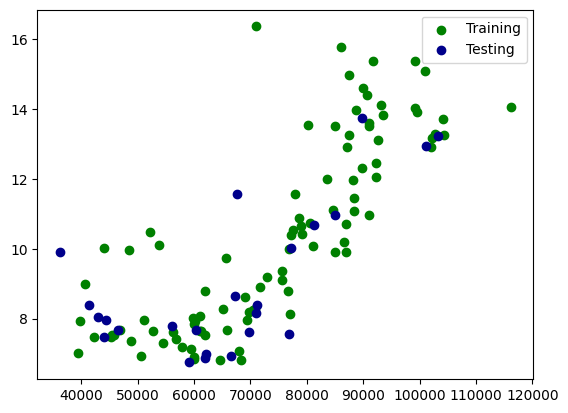

In [6]:
# Plot the splitting results
plt.scatter(X_train, y_train, color='green', label='Training')  # plot the training data in green
plt.scatter(X_test, y_test, color='darkblue', label='Testing')  # plot the testing data in blue
plt.legend()
plt.show()

### Training a linear model

Recall, model training is the process of exposing a model to our data such that it can learn the patterns and combinations of variables which result in a particular response value. For example, financial factors combining to produce an exchange rate.

We will fit our model using the same steps as before, except this time we will **expose it only to the training data**.

In [7]:
# Import the linear regression module
from sklearn.linear_model import LinearRegression

In [8]:
# Declare the model object
lm = LinearRegression()

Below, as we fit the model, we provide it with the **training features and their responses**. This way, it can learn which data points map to which output, as is required of the model training process.

In [9]:
# Fit the model to the training data 
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Extract the intercept, or y-cut, of our linear model
a = float(lm.intercept_)

In [11]:
# Extract the coefficient, or gradient, of our linear model
b = lm.coef_

In [12]:
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

Slope:		 [0.0001199]
Intercept:	 1.4542630444144802


In [13]:
# Extracting the data and fitting the model 

dataset = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/regression_sprint_data_1.csv', index_col=0) 
dataset.head()

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


<Axes: xlabel='Value of Exports (ZAR)', ylabel='ZAR/USD'>

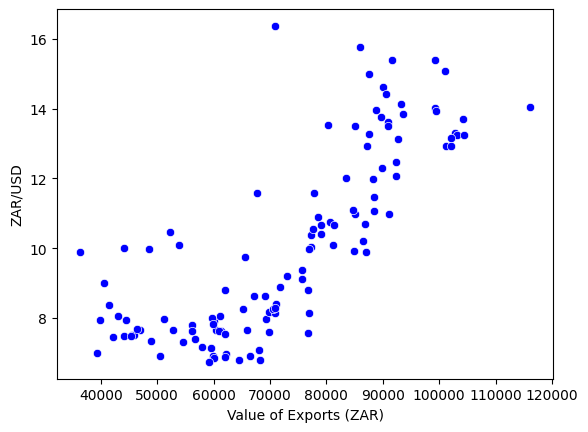

In [41]:
# Checking the kind of relationship existing in our dataset 
sns.scatterplot(x=dataset["Value of Exports (ZAR)"], y=dataset["ZAR/USD"], color="blue")

In [43]:
# Splitting the dataset into train and test subsets X, y
X_train, X_test, y_train, y_test = train_test_split(dataset[["Value of Exports (ZAR)"]], dataset[["ZAR/USD"]], test_size=0.2, random_state=50) 

<Axes: xlabel='Value of Exports (ZAR)', ylabel='ZAR/USD'>

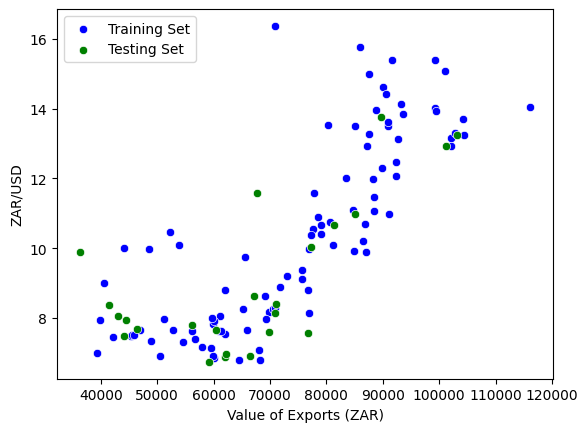

In [49]:
# Testing whether Linear relstionship still exists for training and test data 

sns.scatterplot(x=X_train["Value of Exports (ZAR)"], y=y_train["ZAR/USD"], color="blue", label="Training Set")
sns.scatterplot(x=X_test["Value of Exports (ZAR)"], y=y_test["ZAR/USD"], color="green", label="Testing Set")


In [50]:
# Now fitting the model 
model = LinearRegression()
model.fit(X_train, y_train) 

# Access the slope/gradient and y-intercept 
c = model.intercept_ 
m = model.coef_ 

print(f"Gradient/Slope: {m}")
print(f"Y-Intercept: {c}")

Gradient/Slope: [[0.0001199]]
Y-Intercept: [1.45426304]


<Axes: xlabel='Value of Exports (ZAR)', ylabel='ZAR/USD'>

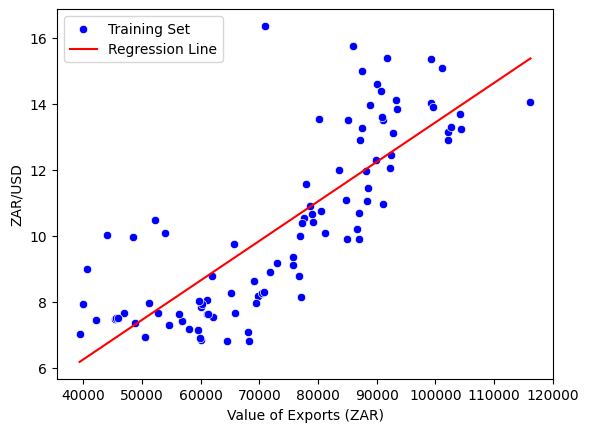

In [56]:
# Making the Predictions 
y_predicted = model.predict(X_train) 

# Plot the training set 
sns.scatterplot(x=X_train["Value of Exports (ZAR)"], y=y_train["ZAR/USD"], color="blue", label="Training Set")

# Plotting the Predict Values/Regression Line 
sns.lineplot(x=X_train["Value of Exports (ZAR)"], y=y_predicted.reshape(-1), color="red", label="Regression Line")

In [ ]:
# Lets assess the performance of the model using SKlearn Metrics 
# Using the Unseen Data 
from sklearn import metrics 

y_test_predicted = model.predict(X_test) 

mean_squared_error = metrics.mean_squared_error(y_test, y_test_predicted) 
root_mean_squared_error = np.sqrt(mean_squared_error)




np.float64(1.743267615026424)

### Assessing the model on the training data

We can get an idea of what the regression line looks like by overlaying it on a scatter plot of the training data.

In order to draw the line, we need to generate the set of points that belong to it. We can do this by using the `predict` method on the model object and having it predict `y` values from the `X` values in the training set.

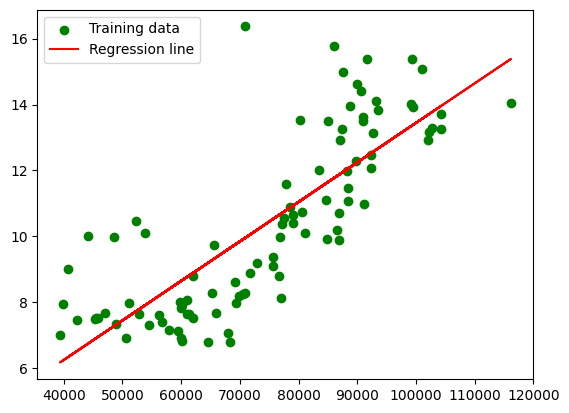

In [51]:
# Generate the values that fall along our regression line
gen_y = lm.predict(X_train)

# Plot the results
plt.scatter(X_train, y_train, color='green', label='Training data')  # Plot the training data in green
plt.plot(X_train, gen_y, color='red', label='Regression line')  # Plot the line connecting the generated y-values
plt.legend()
plt.show()

Now, let's assess the fit of the line to the training data using `sklearn.metrics`.

In [57]:
from sklearn import metrics

In [58]:
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, gen_y))

Training:
MSE: 2.6125475375589073
R_squared: 0.6402293095045937


### Assessing the model on the testing (unseen) data

Our model has been trained. Now we need to show it some data it's never seen before, and ask it to **generate some predictions from that unseen data**. 

In this instance, we don't provide the model with the `y` values (response variable), because that is akin to giving it the answers we are asking it to predict.

Once it has made the predictions, we compare those predictions to the set of `y` values corresponding to the test set, but which the model has not seen. 

> Remember, a linear regression model is simply a straight line, and all predictions it makes will lie on that line.

To make those predictions, we again use the `predict` method on the model object, but this time give it the **_test_ set** from which to make predictions.

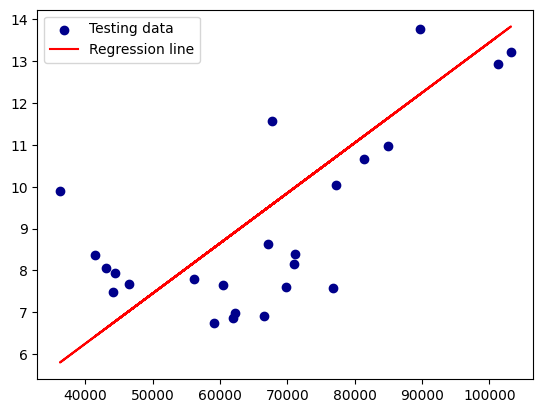

In [61]:
# Generate values of y from x, using the linear model
gen_y_test = lm.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='darkblue', label='Testing data')  # Plot the testing data in blue
plt.plot(X_test, gen_y_test, color='red', label='Regression line')  # Plot the line connecting the generated y-values in red
plt.legend()
plt.show()

Now, we will assess the fit of the line on the unseen testing data by checking **MSE and $R^2$ metrics**.

In [63]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

Testing:
MSE: 3.038981977599916
R_squared: 0.30031043412578884


### Observation

**Mean squared error** is higher on the test set than the train set, indicating poor predictive accuracy.

**R-squared** is lower on the test set, indicating a worse fit on the test set.

These results indicate a concept in machine learning model fitting known as _overfitting_. This is a phenomenon where there is:

- A discrepancy between the performance of the model on train and on test sets.
- An inability of the model to _generalise_ to data it has not seen before.

The term comes from the fact that the model **fits too well, or overfits, the training data**, and does not fit well, or **underfits, the testing data**. 

## Conclusion

In this train, we have seen or been introduced to:
- The concept of _unseen_ data, from the perspective of the model.
- Splitting a dataset into training and testing subsets.
- Calculating or interpreting model parameters (slope, intercept) using the training set.   
- Assessing the accuracy and fit of the model on the testing set.

Subsequently, we will look at methods for improving the predictive accuracy of our model, as well as mitigating overfitting.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>

In [84]:
my_dataset = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/regression_sprint_data_1.csv', index_col=0)
my_dataset.head()

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


In [94]:
# Extract Variables and Split the dataset 
X = my_dataset[["Value of Exports (ZAR)"]] 
y = my_dataset["ZAR/USD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [98]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
# Extract Slope/Gradient and y-intercept 
c = model.intercept_ 
m= model.coef_

print(f"Y Intercept: {c}\nGradient: {m}")

Y Intercept: 1.4542630444144802
Gradient: [0.0001199]


In [100]:
# Making the Predictions
# ____
# Using Seen Data 
y_predicted = model.predict(X_train) 

# Testing the performance 
mse = metrics.mean_squared_error(y_train, y_predicted)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_train, y_predicted) 

# Performance on seen data
print(f"MSE: {mse}\nRMSE: {rmse}\nR2_Score: {r2_score}") 

# Using Unseen Data 
y_test_predicted = model.predict(X_test)

# Testing performance on unseen data 
mse_unseen = metrics.mean_squared_error(y_test, y_test_predicted)
rmse_unseen = np.sqrt(mse_unseen)
r2_score_unseen = metrics.r2_score(y_test, y_test_predicted) 

print("_" * 28)
print(f"MSE: {mse_unseen}\nRMSE: {rmse_unseen}\nR2 Score: {r2_score_unseen}")

MSE: 2.6125475375589073
RMSE: 1.616337692921534
R2_Score: 0.6402293095045937
____________________________
MSE: 3.038981977599916
RMSE: 1.743267615026424
R2 Score: 0.30031043412578884
